### Project 1: (10 points)
#####  your total (60 points) will divided by 6 to get 10 points for this project.

### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide.
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted.

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---


### Dataset:
you can find the dataset on Canvas under Dataset section: Instagram_Data

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn  (1 point)

In [10]:
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


    2- Loading data into Panda datafram, name it insta_df (1 point)
        * load only the first 2000 rows using the "nrows" parameter

#### Note: you should read just the 2000 examples of the data.

Otherwise, your execution time for each command will be long since the data has 178922 samples.

In [11]:
# write you code here
insta_df = pd.read_csv('Instagram_Data.csv', nrows=2000)
insta_df = pd.DataFrame(insta_df)

##
insta_df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84,2020-08-25 18:09:56,2020,8,25,18,9
1996,17,81,193,0.06,Video,4,5,2020-08-18 02:39:23,2020,8,18,2,39
1997,17,251,194,0.19,Image,4,13,2020-08-17 01:17:17,2020,8,17,1,17
1998,17,962,197,0.72,Images,0,38,2020-08-14 18:48:13,2020,8,14,18,48


    3- Show the 10 first rows of the data, its shape, and the coulmens names: (3 points)

In [12]:
# 10 first rows of the data
insta_df.head(10)

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
5,1,539,677,0.79,Images,3,3,2019-04-22 20:03:00,2019,4,22,20,3
6,1,330,677,0.49,Image,0,3,2019-04-22 15:07:34,2019,4,22,15,7
7,1,472,681,0.69,Images,3,7,2019-04-18 14:44:36,2019,4,18,14,44
8,1,272,682,0.40,Image,0,0,2019-04-17 15:42:56,2019,4,17,15,42
9,1,304,688,0.45,Images,3,0,2019-04-11 15:00:05,2019,4,11,15,0


In [13]:
# insta_df shape
insta_df.shape


(2000, 13)

In [14]:
# insta_df column names
insta_df.columns

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

    4- Check the number of samples in the dataset (1 point)

In [15]:
# insta_df row numbers:
len(insta_df)

2000

    5- Check the data type of each column ( 1 point)

In [16]:
insta_df.dtypes

,0
User uuid,int64
Likes,int64
Days passed from post,int64
Likes Score,float64
Type,object
Numer of Tags,int64
Numer of Comments,int64
Date Posted,object
Year,int64
Month,int64


    6- Remove columns from the dataframe:

        a. Remove user id from the insta_df as there is no useful information from this column. (1 point)

        b. Remove the Likes Score since it is calculated from the number of likes. (1 point)

        c. Remove the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes (2 points)

In [17]:
# Remove User uuid
insta_df.drop("User uuid", axis=1, inplace=True)

# Remove User Likes Score
insta_df.drop('Likes Score', axis=1, inplace=True)

# Remove all columns between column index 1 to 3
insta_df.drop(['Date Posted', 'Year', 'Month', 'Day', 'Hour', 'Minute'],axis=1,inplace=True)

# show the insta_df after you remove the required columns
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,Image,3,11
1,385,657,Image,0,1
2,373,666,Images,4,15
3,312,667,Images,4,1
4,513,674,Images,5,0
...,...,...,...,...,...
1995,58,186,Image,0,84
1996,81,193,Video,4,5
1997,251,194,Image,4,13
1998,962,197,Images,0,38


    7- Check how many unique values are on the "Type" column. ( 1 point)
        * you can use the unique() function if you wish

In [18]:
# write you code here
insta_df['Type'].unique()

array(['Image', 'Images', 'Video'], dtype=object)

    8- Use label encoder to change the "Type" coulmn values to numeric values (2 point)

In [19]:
# Encode "Type"
from sklearn.preprocessing import LabelEncoder

type_encode = LabelEncoder()

insta_df['Type'] = type_encode.fit_transform(insta_df['Type'])


##
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,0,3,11
1,385,657,0,0,1
2,373,666,1,4,15
3,312,667,1,4,1
4,513,674,1,5,0
...,...,...,...,...,...
1995,58,186,0,0,84
1996,81,193,2,4,5
1997,251,194,0,4,13
1998,962,197,1,0,38


    9- Check how many NaN values are in each column:

        a. How many NaNs as total ( 1 point)

        b. How many NaNs as a percentage of overall data ( 1 point)

In [20]:
# a. How many NaNs as total
insta_df.isna().sum()

,0
Likes,0
Days passed from post,0
Type,0
Numer of Tags,0
Numer of Comments,0


In [21]:
# b. How many NaNs as a percentage of overall data
(insta_df.isna().sum()/len(insta_df))*100


,0
Likes,0.0
Days passed from post,0.0
Type,0.0
Numer of Tags,0.0
Numer of Comments,0.0


    10- Divide the data into features (X), and target (y) --> your target is Likes  (2 points)

In [22]:
# your featuers X:
X = insta_df.drop(columns = ['Likes'])
##
X

,Days passed from post,Type,Numer of Tags,Numer of Comments
0,657,0,3,11
1,657,0,0,1
2,666,1,4,15
3,667,1,4,1
4,674,1,5,0
...,...,...,...,...
1995,186,0,0,84
1996,193,2,4,5
1997,194,0,4,13
1998,197,1,0,38


In [23]:
# your target y:

y = insta_df['Likes']
##
y

,Likes
0,506
1,385
2,373
3,312
4,513
...,...
1995,58
1996,81
1997,251
1998,962


    11- Checking for Multicollinearity for features (X) using a correlation matrix. (1 points)

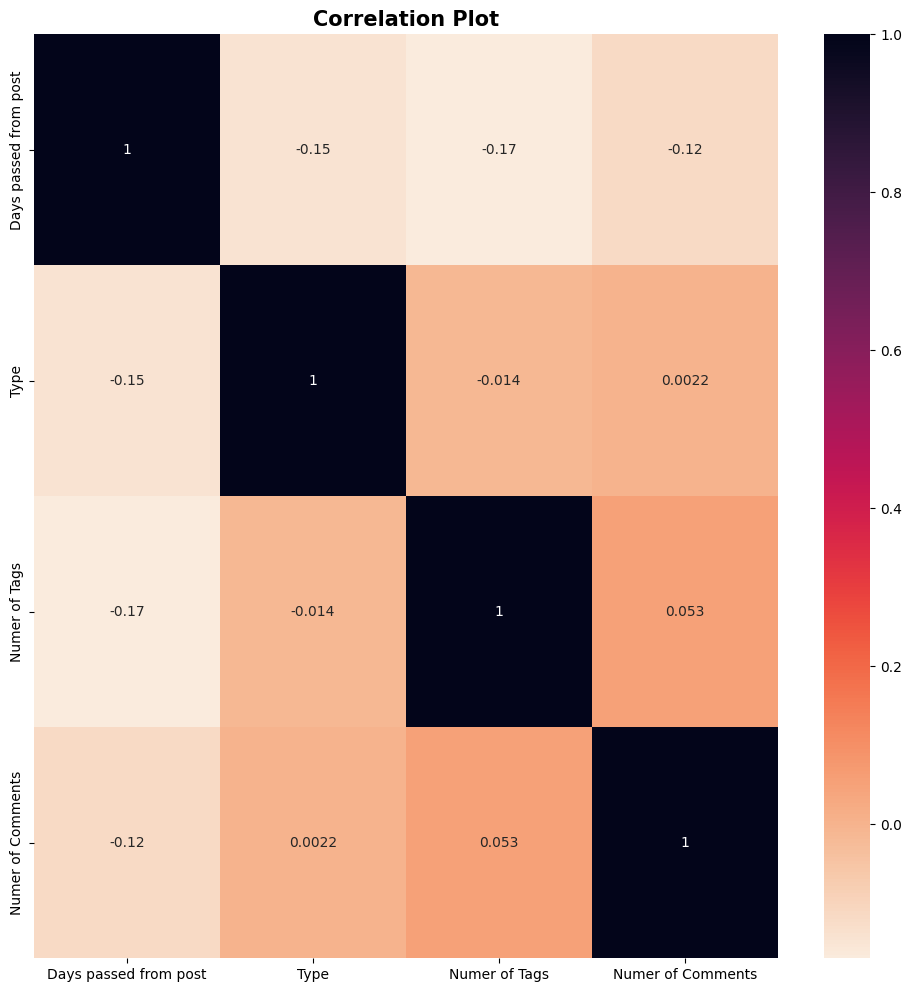

In [35]:
correl_matrix = X.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correl_matrix, annot=True, cmap='rocket_r', cbar=True)
plt.title("Correlation Plot", fontsize=15, color='black', fontweight='bold')
plt.show()

    12- From the above pairplot, what did you observe? ( 1 points)

##### Write your answer here:

* As expected, the correlation of each variable with itself is 1, which is shown along the diagonal of the plot.
* It has a near-zero correlation with "Number of Tags" (-0.014) and "Number of Comments" (0.0022), indicating little to no relationship between the type of post and the number of tags or comments.
* None of the variables show strong correlations (close to 1 or -1), which suggests that these features are mostly independent of each other, or any relationship is very minimal.
* All variables show weak correlations, with the highest being -0.17 (between "Days passed from post" and "Number of Tags"). This indicates there are no strong linear relationships between the variables shown in this plot.


--

    13- Use a scatter plot to check each feature's relationship with the target variable, Likes. (1 points)

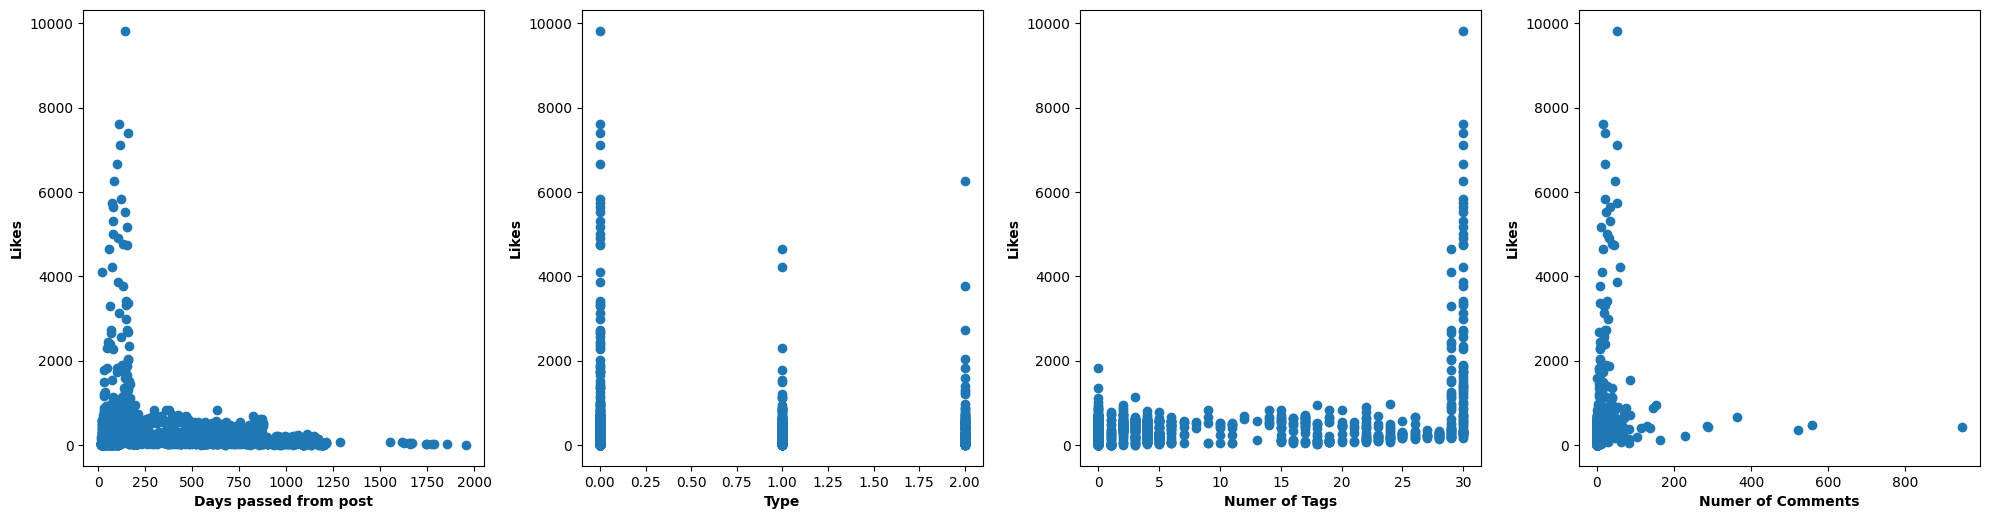

In [50]:
y = insta_df['Likes']
plt.figure(figsize=(20, 10))
features = list(X)
# Loop through the features to create scatter plots
for i, col in enumerate(features):
    plt.subplot(2, 4, i + 1)
    x = insta_df[col]

    # Create a scatter plot for each feature vs Likes
    plt.scatter(x, y, marker='o')
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Likes', fontweight='bold')

plt.tight_layout()  # Adjust subplot spacing to prevent overlap
plt.show()

    14- From the above pairplot, what did you observe? ( 1 points)


##### Write your answer here:

There is a strong negative correlation between likes and days passed since posting; most likes come in early and decrease rapidly over time. Like counts seem to be affected by different post types, as illustrated in the distinct clusters of the likes versus type plot. There seems to be a slight positive correlation among the number of tags with regard to likes, where posts receiving the most likes have about 30 tags. Also, there is an interfering relationship between likes and comments: the more discussion your post creates, the more likes it will receive. In general, according to the data, most likes are received by new posts with a lot of tags and active comment sections, though admittedly the type of the post does matter in its popularity, too.


--

    15- Display the target distribution using histogram (1 points)

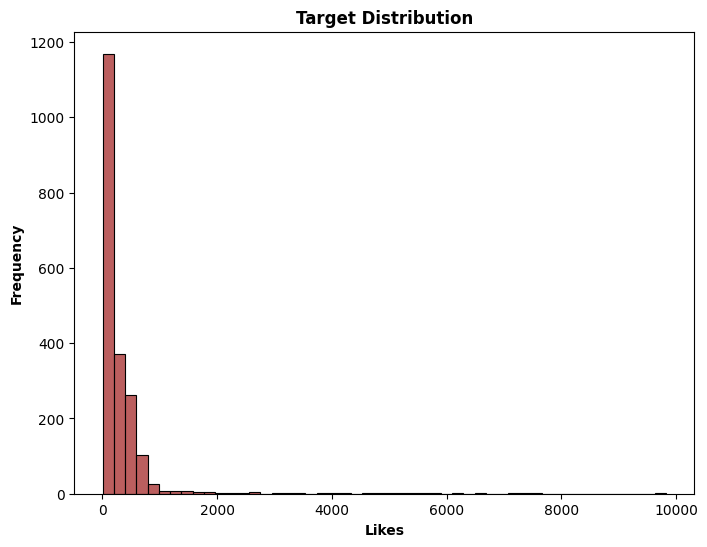

In [61]:
plt.figure(figsize=(8, 6))
sns.histplot(data=insta_df, x='Likes', bins=50, color='brown')

plt.xlabel('Likes', fontweight ='bold')
plt.ylabel('Frequency', fontweight ='bold')
plt.title('Target Distribution', fontweight ='bold')

plt.show()

    16- From the above histogram, what did you observe about the target distribution? ( 1 point)
    

##### Write your answer here:

The histogram shows a highly right-skewed (or positively skewed) distribution of likes. The vast majority of posts receive a relatively low number of likes, clustering near zero. There's a long tail extending to the right, indicating that a small number of posts receive a very high number of likes, up to around 10,000. This suggests that viral or exceptionally popular posts are rare, while most content receives modest engagement. The distribution is not normal or symmetric, but rather follows a pattern typical of social media engagement metrics, where a few posts go viral while most receive limited attention.


--

    17-Transfer the target y into log to have the normal distributions: (1 point)

In [62]:
#transfer the target y into log
y_log = np.log1p(y)

### Preparing the machine learning pipeline


# 18- Splitting the data into training 80% and testing sets 20%. (1 point)
        * print the sizes of our training and test set to verify if the splitting has occurred properly. (1 point)

In [64]:
from sklearn.model_selection import train_test_split

# Splitting the data:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# print the sizes of our training and test set:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1600, 4)
Shape of X_test: (400, 4)
Shape of y_train: (1600,)
Shape of y_test: (400,)


    19- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Use k=10 and MSE as your metric)( 2 point)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one (1 point)
        * print the average MSE (1 point)

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
m_pipeline = make_pipeline(StandardScaler(), LinearRegression())
score = cross_val_score(m_pipeline, X_train, y_train,cv=10, scoring='neg_mean_squared_error')
print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(score)) ))

Average 10-Fold CV MSE Score: 1.2292732341131316


    20- Hyperparameters tuning using GridSearchCV (Use k=10 and MSE as your metric):

        A. Ridge regression:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression (1 point)
            * print the best score and the best alpha value (1 point)

In [107]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# StandardScaler instance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Ridge regression model
model_ridge = Ridge()

# Define the hyperparameter grid with invalid values for demonstration
parameters_ridge = {'alpha': [-3, -2, 1, 2, 3]}

# Set up GridSearchCV
ridge_gridSearchCV = GridSearchCV(
    model_ridge,
    param_grid=parameters_ridge,
    n_jobs=-1,
    cv=10,
    scoring='neg_mean_squared_error'
)

# Suppress warnings during model fitting
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FitFailedWarning)  # Ignore FitFailedWarning
    warnings.filterwarnings("ignore", category=UserWarning)       # Ignore UserWarnings

    # Fit the model
    ridge_gridSearchCV.fit(X_scaled, y_log)

# Print the results
print(f"Ridge Best Param is: {ridge_gridSearchCV.best_params_}")
print(f"Ridge Best score (MSE) is: {-ridge_gridSearchCV.best_score_}")


Ridge Best Param is: {'alpha': 3}
Ridge Best score (MSE) is: 1.9756222518014686


        B. Lasso:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. (1 point)
            * print the best score and the best alpha value (1 point)

In [108]:
# Import Section
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# StandardScaler instance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Lasso regression model
model_lasso = Lasso()

# Define the hyperparameter grid with invalid values for demonstration
parameters_lasso = {'alpha': [-3, -2, 1, 2, 3]}

# Set up GridSearchCV for Lasso
lasso_gridSearchCV = GridSearchCV(
    model_lasso,
    param_grid=parameters_lasso,
    n_jobs=-1,
    cv=10,
    scoring='neg_mean_squared_error'
)

# Suppress warnings during model fitting
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FitFailedWarning)  # Ignore FitFailedWarning
    warnings.filterwarnings("ignore", category=UserWarning)       # Ignore UserWarnings

    # Fit the model
    lasso_gridSearchCV.fit(X_scaled, y_log)

# Print the results
print(f"Lasso Best Param is: {lasso_gridSearchCV.best_params_}")
print(f"Lasso Best score (MSE) is: {-lasso_gridSearchCV.best_score_}")



Lasso Best Param is: {'alpha': 1}
Lasso Best score (MSE) is: 1.8620079218778305


#### Robust regression

      21- Use Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module ( 1 points)
                * print the absolute average MSE (1 point)

In [109]:
from sklearn.linear_model import HuberRegressor
pipeline_huber = make_pipeline(StandardScaler(), HuberRegressor())
scores_huber = cross_val_score(pipeline_huber, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
#force scores to be positive
print("Mean CV MSE Score for Huber regression: {}".format(abs((np.mean(scores_huber)) )))


Mean CV MSE Score for Huber regression: 1.5929287960869258


        B.  The RANSAC regression model modle ( 1 point)
            * print the absolute avarge MSE (1 point)

In [117]:
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error

scaler_X = scaler.fit(X_train)
ransac_regression = RANSACRegressor(random_state=42)
ransac_regression.fit(scaler_X.transform(X_train), y_train)

print(f"Ransac MSE is {mean_squared_error(y_test, ransac_regression.predict(scaler_X.transform(X_test)))}")


Ransac MSE is 1.9934927681253338


    22- From the above models you validated using cross-validation, which model performed very well on average? (1 point)         

##### Write your answer here:
The various models were evaluated during the cross-validation phase, and it was revealed that the Linear Regression was the most accurate among the various options. It had a mean squared error of around 1.22, indicating that its predictions were close to the actual values.


    23- Use the Best model to build/fit your final model using your train-data.(5 points)

In [121]:
linear_model = LinearRegression()

# define scaler for the model
Standard_scaler = StandardScaler()

# pipeline to be used for training
lr_pipeline = make_pipeline(StandardScaler(), linear_model)

# train the pipeline
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

    24- Predict the number of likes for test data and compute the MSE (5 points)

In [122]:
y_predict = lr_pipeline.predict(X_test)

# check the final MSE on test data

print(f"MSE on Test Data {mean_squared_error(y_test, y_predict)}")

MSE on Test Data 1.251756113278545


    25- Write a conclusion about building a good model for predicting the number of likes using Instagram Users Datetime Posts. (10 points)

       your conclusion should include:
        * why a specific model performs better than other models and why a regression algorithm works well with this dataset.
        * Did Robust regression algorithms outperformance the linear regression baseline or linear regression after applying Shrinkage Methods? Why?

    Write a summary of what you understand about linear regression and cross-validation.

why a specific model performs better than other models and why a regression algorithm works well with this dataset?

* Cross-validation is like testing a new recipe. Instead of just tasting one batch and deciding if it's good, you make several batches and taste each one. This gives you a better idea of how the recipe works overall. In machine learning, cross-validation helps us understand how well a model (like a recipe) will work on new data it hasn't seen before.

* Linear regression is like trying to find the perfect balance of ingredients for a cake. You have a bunch of ingredients (variables) and you want to figure out the right amount of each to make the best cake (prediction). It's like drawing a line through a bunch of data points to find the best fit.

Did Robust regression algorithms outperformance the linear regression baseline or linear regression after applying Shrinkage Methods? Why?

* The robust regression method didn't do as well as the basic linear regression. Usually, robust regression is better for messy data with a lot of strange points or complicated relationships. But in this case, the data was pretty simple and easy to understand. So, the basic linear regression was enough.

* The linear regression worked well because the data was straightforward. It wasn't too complicated, and there weren't any weird points that would confuse it. This made it easy for the linear regression to find the right patterns in the data.

---
## All set

Please make sure you execute each cell before you submit your file; this is important becuse if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_1 .
---